# Machine Learning Classification Practice

#### Introduction:
1. Classification comes under Supervised Learning.
2. Classification helps us to classify the data to which category it belongs to. (Yes or No)(Spam/Not Spam)(Risk/No Risk) etc.
3. Classification dependent variable will be categorical or discreate type but regression dependent variable will be
   continuous.
   
#### Algorithms Used:
1. KNN: (K Nearest Neighbours) - Used for both Regression and Classification - Continuous and Discrete data
2. Logistic Regression

#### Working of KNN Algorithm:
1. Find distance of the new data point from all the other datapoints.
2. Choose K value : Number of neibours to select for comparing similar features for new data point.
3. Choosing K can be 3 types : sqrt(total datapoints) / choosing odd value / every K comparision selecting min averaged error.

#### Distance Formulas: 2 and 3 Not Much Used, Eucleadian Is Better in Calculating Distance.
1. Euclidean : square root of sum of squared differences between new point and existing points. (More Used, More Better for
               Distance Calulation). - Squared Difference 
2. Manhatten : Absolute Difference , Distance between real vectors using the sum of their absolute difference.
3. Hamming : D = D then its 0, D != D its 1, if data point is equal to data point its distance will be 0 if not its 1 like that
             used for categorical variable.


### KNN Practice

 Always Scale Down to lesser values in order to avoid fluctuating values for larger datasets and takes long time to 
 calculate distance if not scaled down, one of such scaling methods is standard scaling = data-mean(data)/std(data)

#### Importing Neccesary Packages

In [30]:
# Importing Neccesary Packages
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as mp
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt

#### Data Gathering and Preprocessing

In [2]:
# Getting Seaborn Inbuilt Data Libraries or Datasets
sb.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
# Choosing The Iris Most Common Dataset For Practice
data=sb.load_dataset('iris')

# Viewing Iris Dataset
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# Getting Information About Unique Categories that All the Data is Classified into.
# Iris is a flower and it has 3 species or classes  based on sepal and petal width and heights
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
# Counting Number of Records in Each Category - Observed equally distributed data into all categories. Total 150 records.
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

#### Data Splitting into Train and Test Datasets

In [6]:
# Separating x and y
x=data[['sepal_length','sepal_width','petal_length','petal_width']]
y=data['species']

# splitting into 4 groups
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [7]:
x_train.shape

(127, 4)

In [8]:
y_train.shape

(127,)

In [9]:
x_test.shape

(23, 4)

In [10]:
y_test.shape

(23,)

#### Assigning Value to K

In [11]:
# Assigning Value to K - number of nearest neighbors to compare
K=5

#### Model Building

In [27]:
# Creating model object
knn=KNeighborsClassifier(n_neighbors=K)

# Training Model
knn.fit(x_train,y_train)
print("Training is Completed.")

Training is Completed.


#### Predicting from Test Dataset

In [28]:
pred=knn.predict(x_test)
pred

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica'], dtype=object)

#### Accuracy Test

In [29]:
accuracy_score(y_test,pred)

0.9565217391304348

#### Predicting From User Values

In [15]:
raw=pd.DataFrame({'sepal_length':[4.1],'sepal_width':[2.4],'petal_length':[1.2],'petal_width':[5.6]})
raw

,sepal_length,sepal_width,petal_length,petal_width
0,4.1,2.4,1.2,5.6


In [16]:
knn.predict(raw)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['versicolor'], dtype=object)

#### General Plotting 

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

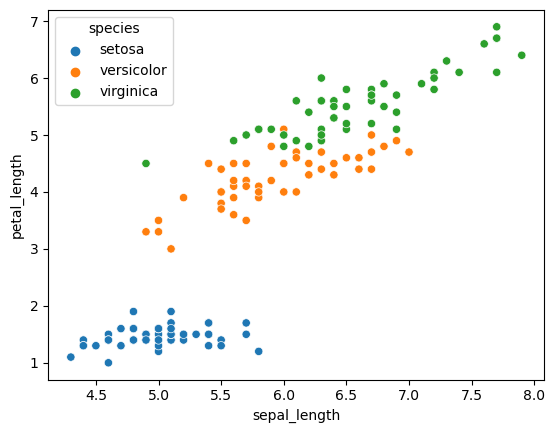

In [17]:
# Only can plot 2D graph not 3D
sb.scatterplot(x='sepal_length',y='petal_length',hue='species',data=data)

In [18]:
x_test['pred']=pred
x_test

,sepal_length,sepal_width,petal_length,petal_width,pred
119,6.0,2.2,5.0,1.5,virginica
1,4.9,3.0,1.4,0.2,setosa
112,6.8,3.0,5.5,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
43,5.0,3.5,1.6,0.6,setosa
96,5.7,2.9,4.2,1.3,versicolor
86,6.7,3.1,4.7,1.5,versicolor
82,5.8,2.7,3.9,1.2,versicolor
103,6.3,2.9,5.6,1.8,virginica
61,5.9,3.0,4.2,1.5,versicolor


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

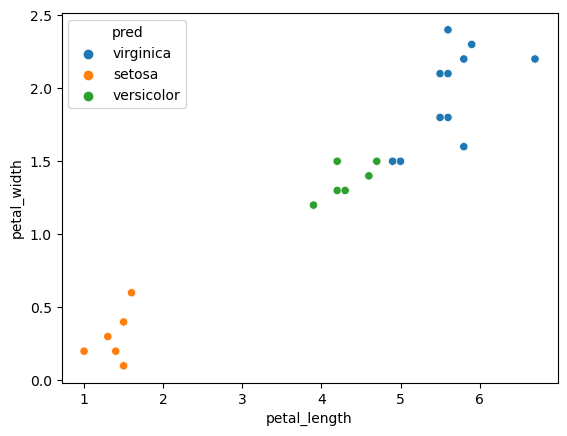

In [19]:
sb.scatterplot(x='petal_length',y='petal_width',hue='pred',data=x_test)

In [20]:
pred

array(['virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica'], dtype=object)

In [21]:
# dropping for furthure practice that extra column added before
#x_test.drop('pred',axis=1,inplace=True)
x_test

,sepal_length,sepal_width,petal_length,petal_width,pred
119,6.0,2.2,5.0,1.5,virginica
1,4.9,3.0,1.4,0.2,setosa
112,6.8,3.0,5.5,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
43,5.0,3.5,1.6,0.6,setosa
96,5.7,2.9,4.2,1.3,versicolor
86,6.7,3.1,4.7,1.5,versicolor
82,5.8,2.7,3.9,1.2,versicolor
103,6.3,2.9,5.6,1.8,virginica
61,5.9,3.0,4.2,1.5,versicolor


In [22]:
# Dropping pred column for further practice
x_test.drop('pred',axis=1,inplace=True)
x_test

,sepal_length,sepal_width,petal_length,petal_width
119,6.0,2.2,5.0,1.5
1,4.9,3.0,1.4,0.2
112,6.8,3.0,5.5,2.1
117,7.7,3.8,6.7,2.2
43,5.0,3.5,1.6,0.6
96,5.7,2.9,4.2,1.3
86,6.7,3.1,4.7,1.5
82,5.8,2.7,3.9,1.2
103,6.3,2.9,5.6,1.8
61,5.9,3.0,4.2,1.5


#### Choosing K

In [23]:
# 1. Using squareroot of total values
k=sqrt(len(data))
k

12.24744871391589

In [24]:
# 2. Better to choose odd number for better prediction, some variables cant be predicted correctly when even number to k
k=5
k

5

In [36]:
# 3. Error Method
errors=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    errors.append(np.mean(pred_i != y_test))
     
# Printing errors predicted
for i in range(1,20):
    print('K =',i,'Error =',errors[i-1])
    
print("\n")

# Getting Minimum and Maximum Errored K
print('Minimum Error: ',min(errors),' is at K = ',errors.index(min(errors))+1)
print('Maximum Error: ',max(errors),' is at K = ',errors.index(max(errors))+1)

K = 1 Error = 0.08695652173913043
K = 2 Error = 0.08695652173913043
K = 3 Error = 0.08695652173913043
K = 4 Error = 0.08695652173913043
K = 5 Error = 0.043478260869565216
K = 6 Error = 0.043478260869565216
K = 7 Error = 0.043478260869565216
K = 8 Error = 0.0
K = 9 Error = 0.0
K = 10 Error = 0.0
K = 11 Error = 0.0
K = 12 Error = 0.0
K = 13 Error = 0.0
K = 14 Error = 0.0
K = 15 Error = 0.0
K = 16 Error = 0.0
K = 17 Error = 0.0
K = 18 Error = 0.0
K = 19 Error = 0.0


Minimum Error:  0.0  is at K =  8
Maximum Error:  0.08695652173913043  is at K =  1


C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

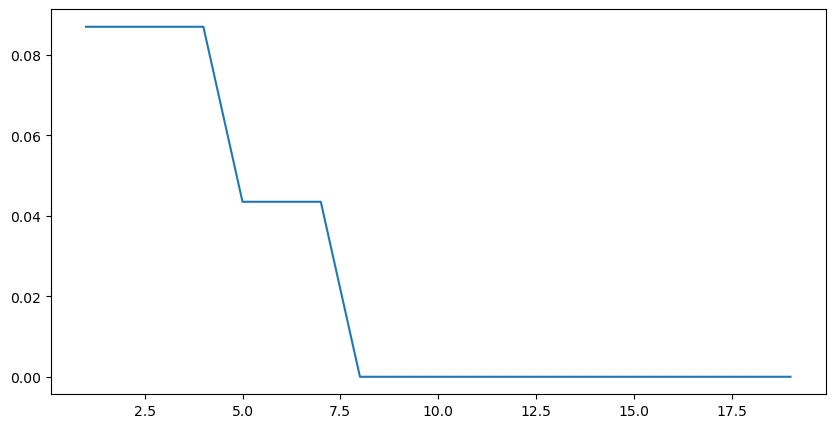

In [40]:
# error method plot
mp.figure(figsize=(10,5))
mp.plot(range(1,20),errors)

In [26]:
# 4. Accuracy Score Method
accuracy=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    
# Printing accuracies predicted
for i in range(1,20):
    print('K =',i,'Accuracy =',accuracy[i-1])
    
print("\n")

# Getting Minimum and Maximum Accuracy of K
print('Minimum Accuracy: ',min(accuracy),' is at K = ',accuracy.index(min(accuracy))+1)
print('Maximum Accuracy: ',max(accuracy),' is at K = ',accuracy.index(max(accuracy))+1)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 1 Accuracy = 0.9130434782608695
K = 2 Accuracy = 0.9130434782608695
K = 3 Accuracy = 0.9130434782608695
K = 4 Accuracy = 0.9130434782608695
K = 5 Accuracy = 0.9565217391304348
K = 6 Accuracy = 0.9565217391304348
K = 7 Accuracy = 0.9565217391304348
K = 8 Accuracy = 1.0
K = 9 Accuracy = 1.0
K = 10 Accuracy = 1.0
K = 11 Accuracy = 1.0
K = 12 Accuracy = 1.0
K = 13 Accuracy = 1.0
K = 14 Accuracy = 1.0
K = 15 Accuracy = 1.0
K = 16 Accuracy = 1.0
K = 17 Accuracy = 1.0
K = 18 Accuracy = 1.0
K = 19 Accuracy = 1.0


Minimum Accuracy:  0.9130434782608695  is at K =  1
Maximum Accuracy:  1.0  is at K =  8


C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

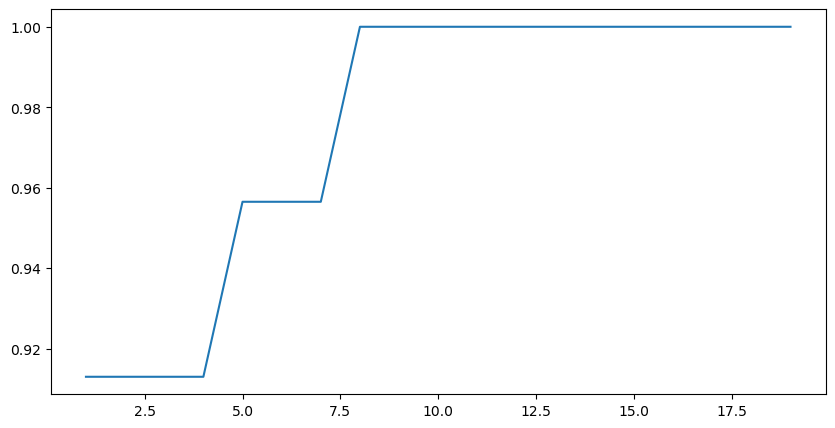

In [39]:
# Accuracy plotting
mp.figure(figsize=(10,5))
mp.plot(range(1,20),accuracy)

In [1]:
# Given home work to scale down and practice and predict deit from seaborn excersise dataset